## NYC IPV Snapshots
1. Name: Intimate Partner Violence Related Snapshots: New York City Community Board Districts
2. Link to Data: [NYC IPV Snapshots](https://data.cityofnewyork.us/Public-Safety/Intimate-Partner-Violence-Related-Snapshots-New-Yo/qiwj-eg47) 
3. Source / Origin: The dataset includes the annual data of 2017 and 2018 for the number of intimate partner related incident reports that occurred at the community board district level in NYC. The data is provided by NYC Policy Department and organized by the Mayor's Office to Combat Domestic Violence (OCDV). 
4. Motivation: For my seminar in applied psychology, I interned for one semester to serve intimate partner violence/domestic violence survivors at the Manhattan Family Justice Center, part of the NYC Mayor's Office to Combat Domestic Violence. Having served individual clients in the frontline, I am curious about a general snapshot of this serious public safety issue across boroughs in NYC. 
5. Questions:
 * What is the most dangerous neighborhood in terms of the number of reported ipv/dv-related cases?
 * What changes have happened from 2017 to 2018?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# read in data
def get_data():
    with open('ipv-nyc-snapshot.csv', 'r') as f:
        data = f.readlines()[1:]
        # remove trailing whitespace
        desc = np.array([line.strip().split(',')[:3] for line in data])
        # convert into integer
        ctrs = np.array([line.strip().split(',')[3:] for line in data], dtype=np.int)
        return desc, ctrs
desc_total, ctrs_total = get_data()

### Descriptive Statistics

#### IPV-DIR & DV Rape by year
look into the number of domestic violence incident reports that involved initimate partners & the number of domestic violence rape in 2017 and 2018

In [3]:
# seperating 2017 and 2018 data
is2017 = np.where(desc_total[:, 0] == "2017")
is2018 = np.where(desc_total[:, 0] == "2018")
desc_by_year = {"2017": desc_total[is2017], "2018": desc_total[is2018]}
ctrs_by_year = {"2017": ctrs_total[is2017], "2018": ctrs_total[is2018]}

In [4]:
print('>> Examine outliers with min/max....\n')
for i, v in ctrs_by_year.items():
    print(f'* For year {i}, by community district\n')
    max_dir = desc_by_year[i][np.where(v[:, 0] == max(v[:, 0]))][0]
    min_dir = desc_by_year[i][np.where(v[:, 0] == min(v[:, 0]))][0]
    max_rp = desc_by_year[i][np.where(v[:, -1] == max(v[:, -1]))][0]
    min_rp = desc_by_year[i][np.where(v[:, -1] == min(v[:, -1]))][0]
    print(f'The max of ipv-dir reports is {max(v[:, 0])}')
    print(f'  > from district {max_dir[2]} in borough {max_dir[1]}')
    print(f'The min of ipv-dir reports is {min(v[:, 0])}')
    print(f'  > from district {min_dir[2]} in borough {min_dir[1]}\n') 
    print(f'The max of dv rape reports is {max(v[:, -1])}')
    print(f'  > from district {max_rp[2]} in borough {max_rp[1]}')
    print(f'The min of dv rape reports is {min(v[:, -1])}')
    print(f'  > from district {min_rp[2]} in borough {min_rp[1]}\n\n') 

>> Examine outliers with min/max....

* For year 2017, by community district

The max of ipv-dir reports is 4317
  > from district 5 in borough Brooklyn
The min of ipv-dir reports is 11
  > from district SIJIA in borough Staten Island

The max of dv rape reports is 25
  > from district 5 in borough Brooklyn
The min of dv rape reports is 0
  > from district BXJIA in borough Bronx


* For year 2018, by community district

The max of ipv-dir reports is 4307
  > from district 5 in borough Brooklyn
The min of ipv-dir reports is 1
  > from district Unknown in borough Staten Island

The max of dv rape reports is 30
  > from district 5 in borough Brooklyn
The min of dv rape reports is 0
  > from district BXJIA in borough Bronx




In [5]:
print('>> Measure central tendency....\n')
for i, v in ctrs_by_year.items():
    print(f'* For year {i}, by community district\n')
    print(f'The mean of ipv-dir reports is {(v[:, 0]).mean()}') 
    print(f'The median of ipv-dir reports is {np.median(v[:, 0])}\n')
    print(f'The mean of dv rape reports is {(v[:, -1]).mean()}') 
    print(f'The median of dv rape reports is {np.median(v[:, -1])}\n\n')


>> Measure central tendency....

* For year 2017, by community district

The mean of ipv-dir reports is 1700.328125
The median of ipv-dir reports is 1517.0

The mean of dv rape reports is 7.859375
The median of dv rape reports is 7.0


* For year 2018, by community district

The mean of ipv-dir reports is 1612.8985507246377
The median of ipv-dir reports is 1532.0

The mean of dv rape reports is 9.840579710144928
The median of dv rape reports is 9.0




In [6]:
print('>> Measure dispersion....\n')
for i, v in ctrs_by_year.items():
    print(f'* For year {i}, by community district')
    iqr = lambda x: np.quantile(x, 0.75) - np.quantile(x, 0.25)
    print(f'The variance of ipv-dir reports is {np.var(v[:, 0])}') 
    print(f'The standard deviation of ipv-dir reports is {np.std(v[:, 0])}')
    print(f'The interquartile range of ipv-dir reports is {iqr(v[:, 0])}\n')
    print(f'The variance of ipv-dir reports is {np.var(v[:, -1])}') 
    print(f'The standard deviation of ipv-dir reports is {np.std(v[:, -1])}')
    print(f'The interquartile range of ipv-dir reports is {iqr(v[:, -1])}\n\n')

>> Measure dispersion....

* For year 2017, by community district
The variance of ipv-dir reports is 1086288.7829589844
The standard deviation of ipv-dir reports is 1042.2517848192847
The interquartile range of ipv-dir reports is 1570.5

The variance of ipv-dir reports is 38.089599609375
The standard deviation of ipv-dir reports is 6.171677212020652
The interquartile range of ipv-dir reports is 11.0


* For year 2018, by community district
The variance of ipv-dir reports is 1252077.4824616679
The standard deviation of ipv-dir reports is 1118.962681442803
The interquartile range of ipv-dir reports is 1366.0

The variance of ipv-dir reports is 57.206469229153534
The standard deviation of ipv-dir reports is 7.563495833882209
The interquartile range of ipv-dir reports is 11.0




#### IPV-DIR & DV Rape by borough
look into the number of domestic violence incident reports that involved initimate partners & the number of domestic violence rape

In [7]:
# seperating borough data
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
ipv_dir_by_borough = {'2017': {}, '2018': {}}
dv_rape_by_borough = {'2017': {}, '2018': {}}
for b in boroughs:
    is2017 = np.where(desc_by_year['2017'][:, 1] == b)
    is2018 = np.where(desc_by_year['2018'][:, 1] == b)
    ipv_dir_by_borough['2017'][b] = sum(ctrs_by_year['2017'][is2017][:, 0])
    ipv_dir_by_borough['2018'][b] = sum(ctrs_by_year['2018'][is2018][:, 0])
    dv_rape_by_borough['2017'][b] = sum(ctrs_by_year['2017'][is2017][:, -1])
    dv_rape_by_borough['2018'][b] = sum(ctrs_by_year['2018'][is2018][:, -1])

print(f'IPV-DIR by borough:\n{ipv_dir_by_borough}\n')
print(f'DV-Rape by borough:\n{dv_rape_by_borough}')

IPV-DIR by borough:
{'2017': {'Bronx': 28269, 'Brooklyn': 32868, 'Manhattan': 17360, 'Queens': 23863, 'Staten Island': 6461}, '2018': {'Bronx': 29762, 'Brooklyn': 32560, 'Manhattan': 17783, 'Queens': 24537, 'Staten Island': 6648}}

DV-Rape by borough:
{'2017': {'Bronx': 128, 'Brooklyn': 153, 'Manhattan': 75, 'Queens': 126, 'Staten Island': 21}, '2018': {'Bronx': 149, 'Brooklyn': 212, 'Manhattan': 102, 'Queens': 179, 'Staten Island': 37}}


### Visualizations

Text(0.5, 1.0, '2018 - IPV-Dir')

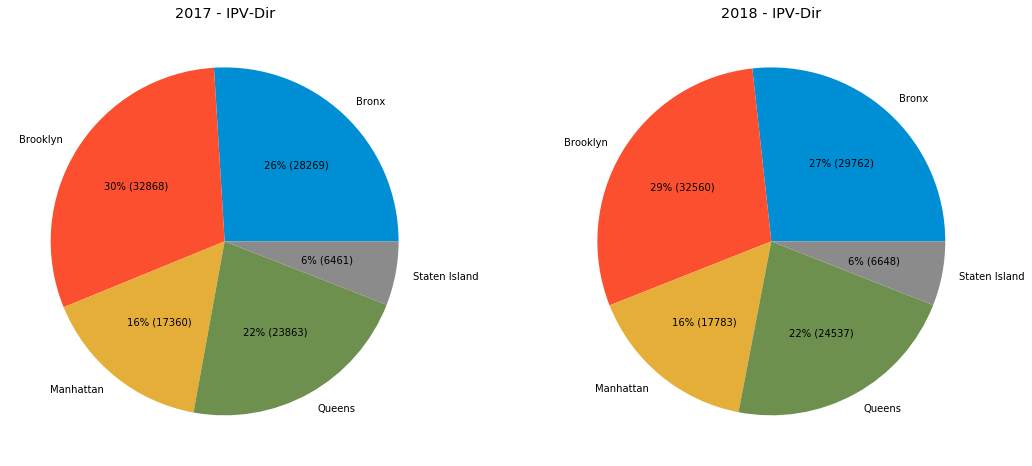

In [8]:
def make_autopct_func(sizes):
    return lambda x: f'{int(round(x))}% ({int(round(x * 0.01 * sum(sizes)))})'

plt.rcParams['figure.figsize']=(16,8)
plt.subplot(1,2,1)
plt.pie(ipv_dir_by_borough['2017'].values(), labels=boroughs, autopct=make_autopct_func(ipv_dir_by_borough['2017'].values()))
plt.title('2017 - IPV-Dir')

plt.subplot(1,2,2)
plt.pie(ipv_dir_by_borough['2018'].values(), labels=boroughs, autopct=make_autopct_func(ipv_dir_by_borough['2018'].values()))
plt.title('2018 - IPV-Dir')


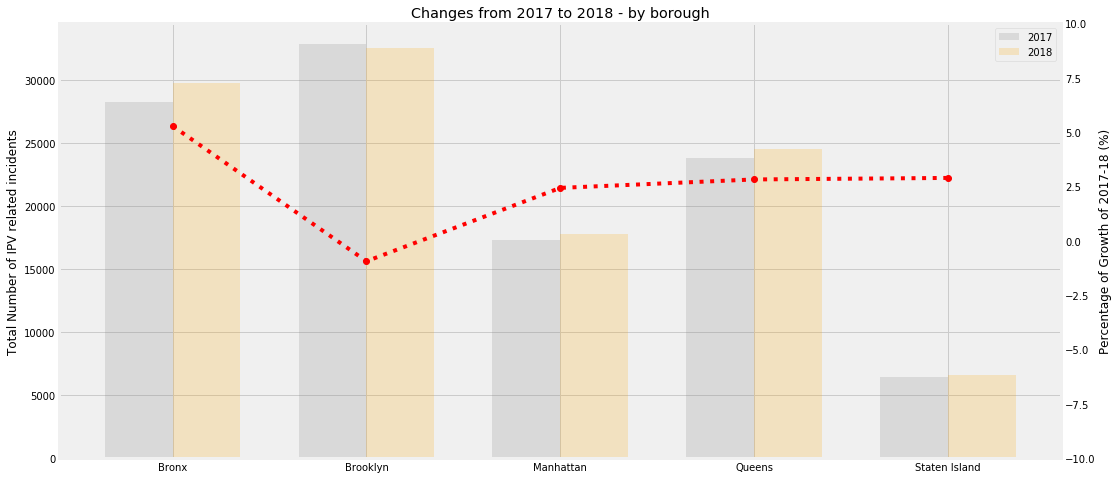

In [9]:
n2017 = ipv_dir_by_borough['2017'].values()
n2018 = ipv_dir_by_borough['2018'].values()
growth_rate = [(ipv_dir_by_borough['2018'][b]/ipv_dir_by_borough['2017'][b]-1)*100 for b in boroughs]

x = np.arange(len(boroughs))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams['figure.figsize']=(16,8)
fig, ax1 = plt.subplots()
rects1 = ax1.bar(x - width/2, n2017, width, label='2017', alpha=0.2, color='grey')
rects2 = ax1.bar(x + width/2, n2018, width, label='2018', alpha=0.2, color='orange')
ax1.set_title('Changes from 2017 to 2018 - by borough')
ax1.set_ylabel('Total Number of IPV related incidents')
ax1.set_xticklabels(boroughs)
ax1.legend()

ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(boroughs, growth_rate, 'r:o')
ax2.grid(b=False) # turn off grid #2
ax2.set_ylim((-10, 10))
ax2.set_ylabel('Percentage of Growth of 2017-18 (%)')

plt.show()

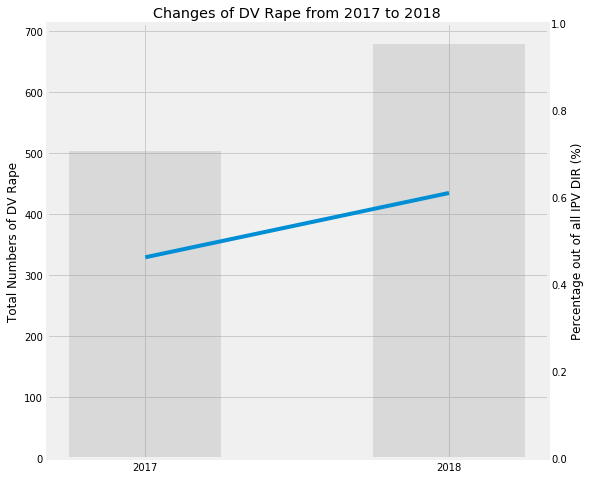

In [10]:
labels = ctrs_by_year.keys()

dv_rape = [sum(v[:, -1]) for v in ctrs_by_year.values()]
dv_rape_rate = [sum(v[:, -1]) / sum(v[:, 0]) * 100 for v in ctrs_by_year.values()]

plt.rcParams['figure.figsize']=(8,8)
fig, ax1 = plt.subplots()
ax1.bar(labels, dv_rape, width=.5, alpha=0.2, color='grey') 
ax1.set_title('Changes of DV Rape from 2017 to 2018')
ax1.set_ylabel('Total Numbers of DV Rape')
ax1.set_xticklabels(labels)

ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(labels, dv_rape_rate)
ax2.grid(b=False) # turn off grid #2
ax2.set_ylim(0, 1)
ax2.set_ylabel('Percentage out of all IPV DIR (%)')

plt.show()

### Conclusions

#### Central Tendency
From the calculations of central tendency, we can see that for both year 2017 and 2018, and for both the number of ipv-related incidents reports and the number of dv-related rape reports, the mean is greater than the median, indicating there might be a few districts that reported markedly more incidents. 

#### Dispersion
From the calculations of dispersion, we can see that the data is rather scattered, which is understandable given the size of each district varies markedly.

#### Other Trends
In addition, the calculations show that for both year 2017 and 2018, the maximum number of both the intimate partner related incident reports and dv-related rape reports occurs at the District 5 in Brooklyn. This piece of information answers ***the first research question***, suggesting that District 5, Brooklyn may be a particularly dangerous neighborhood in term of ipv/dv. 

-----
While the calculations looked at year 2017 and 2018 separately, the visualizations attempted to look at the data of both years side by side, providing some insights into ***the second question***. 

#### Pie Charts - Changes in Proportions of Borough
From the first visualization, we could see how much proportion a borough takes in the total number of incidents. We could see that in 2017, 30% of the cases in NYC was reported in Brooklyn, followed by 26% in Bronx, 22% in Queens, 16% in Manhattan, and 6% in Staten Island. Given some external data about the total population in each borough (BK > QN > MN > BX > SI), we can see that the percentage of ipv/dv cases in terms of total population is disproportionately high in Bronx. The comparison of the two pie charts also suggested that there were no remarkable changes from 2017 to 2018 in terms of the proportion of each borough. 

#### Bar + Line - Changes in # IPV-DIR in each Borough
The second graph tells us more about the exact changes in terms of number of reports in each borough. We can see that though Brooklyn has largest number of reports in both 2017 and 2018, it is in fact the only borough where the number did not increase from 2017 to 2018. Bronx, in particular, has a growth rate of over 5%, which could be an alarming sign for OCDV to look at. 

#### Bar + Line - Changes in # DV-Rape
In addition to the total number of ipv/dv related reports, the third graph looked in the number of dv-related rape reports. We can see that not only the number of cases increased from 2017 to 2018, its proportion to all the ipv/dv related reports also increased by around 0.2%. 
